    导入初始数据

In [49]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('用户新增预测挑战赛公开数据/train.csv')
test_data = pd.read_csv('用户新增预测挑战赛公开数据/test.csv')

    独热编码

In [50]:
def udmap_onethot(d):
    v = np.zeros(9)
    if d == 'unknown':
        return v

    d = eval(d)
    for i in range(1, 10):
        if 'key' + str(i) in d:
            v[i-1] = d['key' + str(i)]

    return v

train_udmap_df = pd.DataFrame(np.vstack(train_data['udmap'].apply(udmap_onethot)))
test_udmap_df = pd.DataFrame(np.vstack(test_data['udmap'].apply(udmap_onethot)))

train_udmap_df.columns = ['key' + str(i) for i in range(1, 10)]
test_udmap_df.columns = ['key' + str(i) for i in range(1, 10)]

train_data = pd.concat([train_data, train_udmap_df], axis=1)
test_data = pd.concat([test_data, test_udmap_df], axis=1)

    数据处理

In [51]:
train_data['eid_freq'] = train_data['eid'].map(train_data['eid'].value_counts())
test_data['eid_freq'] = test_data['eid'].map(train_data['eid'].value_counts())

train_data['eid_mean'] = train_data['eid'].map(train_data.groupby('eid')['target'].mean())
test_data['eid_mean'] = test_data['eid'].map(train_data.groupby('eid')['target'].mean())

In [52]:
train_data['udmap_isunknown'] = (train_data['udmap'] == 'unknown').astype(int)
test_data['udmap_isunknown'] = (test_data['udmap'] == 'unknown').astype(int)

In [53]:
train_data['common_ts'] = pd.to_datetime(train_data['common_ts'], unit='ms')
test_data['common_ts'] = pd.to_datetime(test_data['common_ts'], unit='ms')

In [54]:
train_data['common_ts_hour'] = train_data['common_ts'].dt.hour
test_data['common_ts_hour'] = test_data['common_ts'].dt.hour

In [55]:
# 将毫秒时间戳转换为日期时间类型
train_data_temp_common_ts = pd.to_datetime(train_data['common_ts'], unit='ms')
test_data_temp_commonn_ts = pd.to_datetime(test_data['common_ts'], unit='ms')

# 提取星期几的数字表示作为新的列
train_data['common_ts_weekday'] = train_data_temp_common_ts.dt.dayofweek
test_data['common_ts_weekday'] = test_data_temp_commonn_ts.dt.dayofweek

import pandas as pd

# 假设训练集数据已经导入到名为 train_df 的 Pandas DataFrame 中，包含字段 x1 至 x7

# 定义异常值判断阈值（根据箱线图的定义，通常将小于下边界或大于上边界的值视为异常值）
lower_bound = train_data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']].quantile(0.25) - 1.5 * (train_data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']].quantile(0.75) - train_data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']].quantile(0.25))
upper_bound = train_data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']].quantile(0.75) + 1.5 * (train_data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']].quantile(0.75) - train_data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']].quantile(0.25))

# 判断并处理异常值
for col in ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']:
    train_data = train_data[(train_data[col] >= lower_bound[col]) & (train_data[col] <= upper_bound[col])]

In [56]:
# train_data['x1_freq'] = train_data['x1'].map(train_data['x1'].value_counts())
# test_data['x1_freq'] = test_data['x1'].map(train_data['x1'].value_counts())
train_data['x1_mean'] = train_data['x1'].map(train_data.groupby('x1')['target'].mean())
test_data['x1_mean'] = test_data['x1'].map(train_data.groupby('x1')['target'].mean())

train_data['x2_freq'] = train_data['x2'].map(train_data['x2'].value_counts())
test_data['x2_freq'] = test_data['x2'].map(train_data['x2'].value_counts())
train_data['x2_mean'] = train_data['x2'].map(train_data.groupby('x2')['target'].mean())
test_data['x2_mean'] = test_data['x2'].map(train_data.groupby('x2')['target'].mean())

# train_data['x3_freq'] = train_data['x3'].map(train_data['x3'].value_counts())
# test_data['x3_freq'] = test_data['x3'].map(train_data['x3'].value_counts())
# train_data['x3_mean'] = train_data['x3'].map(train_data.groupby('x3')['target'].mean())
# test_data['x3_mean'] = test_data['x3'].map(train_data.groupby('x3')['target'].mean())

# train_data['x4_freq'] = train_data['x4'].map(train_data['x4'].value_counts())
# test_data['x4_freq'] = test_data['x4'].map(train_data['x4'].value_counts())
train_data['x4_mean'] = train_data['x4'].map(train_data.groupby('x4')['target'].mean())
test_data['x4_mean'] = test_data['x4'].map(train_data.groupby('x4')['target'].mean())

# train_data['x5_freq'] = train_data['x5'].map(train_data['x5'].value_counts())
# test_data['x5_freq'] = test_data['x5'].map(train_data['x5'].value_counts())
train_data['x5_mean'] = train_data['x5'].map(train_data.groupby('x5')['target'].mean())
test_data['x5_mean'] = test_data['x5'].map(train_data.groupby('x5')['target'].mean())

# train_data['x6_freq'] = train_data['x6'].map(train_data['x6'].value_counts())
# test_data['x6_freq'] = test_data['x6'].map(train_data['x6'].value_counts())
# train_data['x6_mean'] = train_data['x6'].map(train_data.groupby('x6')['target'].mean())
# test_data['x6_mean'] = test_data['x6'].map(train_data.groupby('x6')['target'].mean())
#
# train_data['x7_freq'] = train_data['x7'].map(train_data['x7'].value_counts())
# test_data['x7_freq'] = test_data['x7'].map(train_data['x7'].value_counts())
train_data['x7_mean'] = train_data['x7'].map(train_data.groupby('x7')['target'].mean())
test_data['x7_mean'] = test_data['x7'].map(train_data.groupby('x7')['target'].mean())

    异常值处理

    判断数据类别

In [57]:
import pandas as pd

# 假设数据集已经导入到名为df的Pandas DataFrame中

# 选择字段x1至x8
fields = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']


# 判断字段数据类型
data_types = []
for field in fields:
    unique_values = train_data[field].nunique()
    if unique_values <= 2:
        data_types.append('categorical')
    else:
        data_types.append('numerical')

# 输出字段数据类型
for field, data_type in zip(fields, data_types):
    print(f"{field}: {data_type}")

x1: numerical
x2: numerical
x3: numerical
x4: numerical
x5: numerical
x6: numerical
x7: numerical
x8: categorical


    数据筛选，绘制相关性热力图

与目标相关性最大的五个特征:
eid_mean           0.302509
x7                 0.199992
eid_freq           0.155212
x8                 0.127709
udmap_isunknown    0.055496
Name: target, dtype: float64
与目标相关性最小的三个特征:
uuid              0.000009
x1                0.002941
common_ts_hour    0.006896
Name: target, dtype: float64


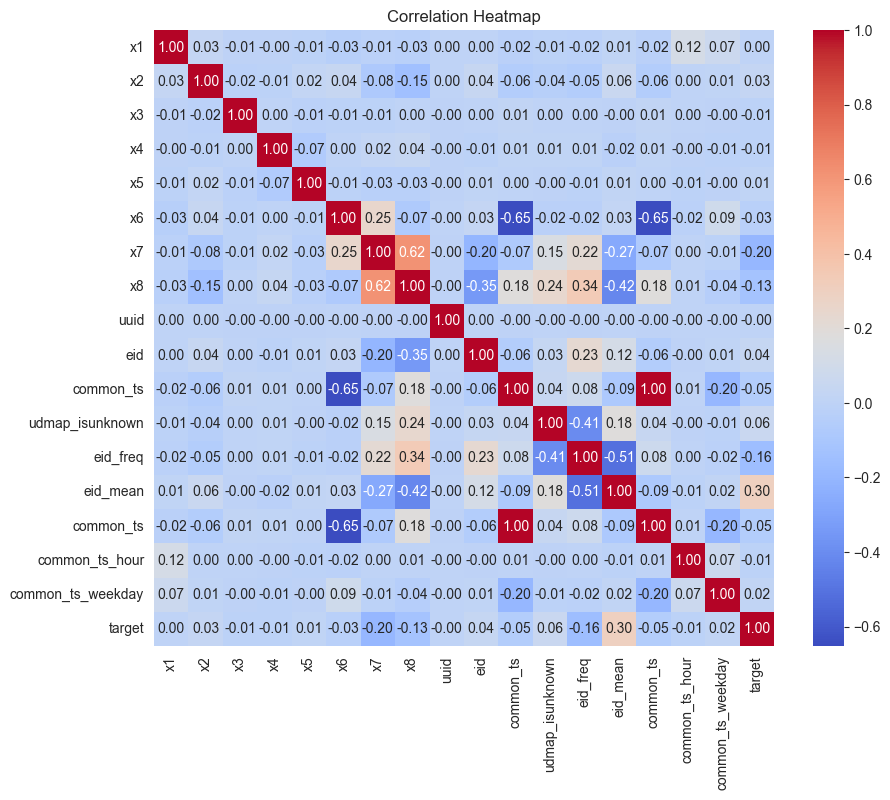

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
# 选择相关的特征列和目标列
feature_columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
                   # 'x1_mean','x1_freq','x2_mean','x2_freq','x3_mean','x3_freq','x4_mean','x4_freq',
                   # 'x5_mean','x5_freq','x6_mean','x6_freq','x7_mean','x7_freq',]
                   'uuid', 'eid', 'common_ts', 'udmap_isunknown', 'eid_freq', 'eid_mean', 'common_ts', 'common_ts_hour','common_ts_weekday']

target_column = 'target'

# 计算特征与目标之间的相关性
correlation_matrix = train_data[feature_columns + [target_column]].corr()
# 输出与目标相关性最大的五个特征
top_correlated_features = correlation_matrix[target_column].abs().nlargest(6)[1:]
print("与目标相关性最大的五个特征:")
print(top_correlated_features)
# 输出与目标相关性最小的三个特征
bottom_correlated_features = correlation_matrix[target_column].abs().nsmallest(3)
print("与目标相关性最小的三个特征:")
print(bottom_correlated_features)

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

    数据特征筛选


    模型训练样本

In [59]:
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
clf = DecisionTreeClassifier()
clf.fit(
    train_data.drop(['udmap', 'common_ts', 'uuid', 'target'], axis=1),
    train_data['target']
)
# 对训练数据进行预测并计算F1分数
train_predictions = clf.predict(train_data.drop(['udmap', 'common_ts', 'uuid', 'target'], axis=1))
train_f1_score = f1_score(train_data['target'], train_predictions)

print("Train F1 Score:", train_f1_score)

pd.DataFrame({
    'uuid': test_data['uuid'],
    'target': clf.predict(test_data.drop(['udmap', 'common_ts', 'uuid'], axis=1))
}).to_csv('submit.csv', index=None)

Train F1 Score: 0.9744191177324399


    个人训练测试